In [2]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn .ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
data=pd.read_csv("ecosystem_data.csv")
data.head()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded


In [4]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [5]:
#Encode target label 
data['ecosystem_health']=data['ecosystem_health'].map({'healthy':0,'at risk':1,'degraded':2})
data.ecosystem_health

0       2
1       2
2       2
3       2
4       2
       ..
9995    2
9996    1
9997    2
9998    2
9999    2
Name: ecosystem_health, Length: 10000, dtype: int64

In [6]:
#Feature selection
x=data.drop('ecosystem_health',axis=1)
y=data['ecosystem_health']


In [7]:
x.shape

(10000, 5)

In [8]:
y.shape

(10000,)

In [9]:
#splitting the dataset fro training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=22)

In [10]:
x_train.shape

(8000, 5)

In [11]:
x_test.shape

(2000, 5)

In [12]:
#initialize the model and train it
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred=model.predict(x_test)

In [14]:
y_pred

array([2, 2, 2, ..., 2, 1, 2], shape=(2000,))

In [15]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy is :",accuracy)


Accuracy is : 0.961


In [17]:
#Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred,target_names=['Healthy','At risk','Degraded']))

Classification Report
              precision    recall  f1-score   support

     Healthy       1.00      0.41      0.58        22
     At risk       0.92      0.70      0.79       215
    Degraded       0.96      1.00      0.98      1763

    accuracy                           0.96      2000
   macro avg       0.96      0.70      0.79      2000
weighted avg       0.96      0.96      0.96      2000



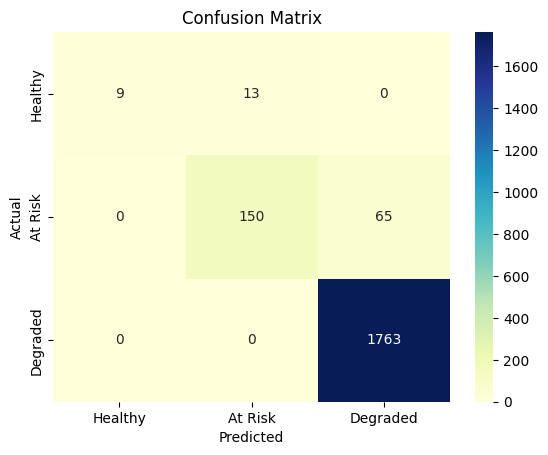

In [20]:
#Confusion matrix 
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Healthy', 'At Risk', 'Degraded'],
            yticklabels=['Healthy', 'At Risk', 'Degraded'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()